<a href="https://colab.research.google.com/github/MientusJJ/Python-Exercises/blob/main/Kopia_notatnika_Z10_I_save_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('adult.data', sep=", ",header = None)
test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


<ipython-input-4-b8b4c014ef00>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('adult.data', sep=", ",header = None)


FileNotFoundError: ignored

# Zad.
Zróbmy szybki preprocesing

In [ ]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [ ]:
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[save_best_model])

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 52us/step - loss: 0.4761 - accuracy: 0.7761 - val_loss: 0.3871 - val_accuracy: 0.8108
Epoch 2/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.3862 - accuracy: 0.8083 - val_loss: 0.3812 - val_accuracy: 0.8055
Epoch 3/100
30162/30162 [==============================] - 2s 51us/step - loss: 0.3754 - accuracy: 0.8134 - val_loss: 0.3770 - val_accuracy: 0.8155
Epoch 4/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3718 - accuracy: 0.8134 - val_loss: 0.3654 - val_accuracy: 0.8177
Epoch 5/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3723 - accuracy: 0.8116 - val_loss: 0.3715 - val_accuracy: 0.8168
Epoch 6/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3708 - accuracy: 0.8133 - val_loss: 0.3650 - val_accuracy: 0.8159
Epoch 7/100
30162/30162 [==============================] - 1s 

Epoch 56/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3570 - accuracy: 0.8181 - val_loss: 0.3664 - val_accuracy: 0.8164
Epoch 57/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.3567 - accuracy: 0.8202 - val_loss: 0.3724 - val_accuracy: 0.8053
Epoch 58/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.3561 - accuracy: 0.8190 - val_loss: 0.3648 - val_accuracy: 0.8172
Epoch 59/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3553 - accuracy: 0.8192 - val_loss: 0.3617 - val_accuracy: 0.8173
Epoch 60/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3555 - accuracy: 0.8223 - val_loss: 0.3626 - val_accuracy: 0.8185
Epoch 61/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3547 - accuracy: 0.8198 - val_loss: 0.3691 - val_accuracy: 0.8124
Epoch 62/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3561 - accuracy: 0.8200

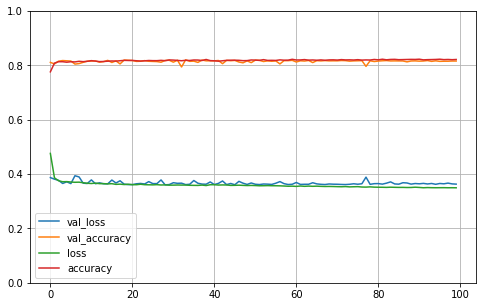

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 0s 16us/step


[0.36299147292437306, 0.8158698678016663]

In [ ]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

0.8158698539176626

# Zad

Wczytaj nauczony model

In [ ]:
model.load_weights("wagi_best.h5py")
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 0s 15us/step


[0.36044085541886006, 0.818061113357544]

# Zad

* Naucz dowolny model na zbiorze MNIST.
* Zapisz optymalne parametry uczenia do pliku
* Wczytaj dane z pliku

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
from keras.callbacks import ModelCheckpoint
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

save_best_model = ModelCheckpoint("wagi_best2.h5py",save_best_only=True)
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
save_best_model = ModelCheckpoint("wagi_best2.h5py",save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[save_best_model])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - ETA: 0s - loss: 0.6311 - accuracy: 0.8358

1719/1719 [==============================] - 10s 6ms/step - loss: 0.6311 - accuracy: 0.8358 - val_loss: 0.3092 - val_accuracy: 0.9164
Epoch 2/30
1717/1719 [============================>.] - ETA: 0s - loss: 0.2931 - accuracy: 0.9163

1719/1719 [==============================] - 9s 5ms/step - loss: 0.2931 - accuracy: 0.9163 - val_loss: 0.2431 - val_accuracy: 0.9328
Epoch 3/30
1716/1719 [============================>.] - ETA: 0s - loss: 0.2399 - accuracy: 0.9312

1719/1719 [==============================] - 8s 5ms/step - loss: 0.2399 - accuracy: 0.9312 - val_loss: 0.2033 - val_accuracy: 0.9424
Epoch 4/30
1714/1719 [============================>.] - ETA: 0s - loss: 0.2045 - accuracy: 0.9408

1719/1719 [==============================] - 9s 5ms/step - loss: 0.2044 - accuracy: 0.9409 - val_loss: 0.1792 - val_accuracy: 0.9490
Epoch 5/30
1715/1719 [============================>.] - ETA: 0s - loss: 0.1785 - accuracy: 0.9490

1719/1719 [==============================] - 9s 5ms/step - loss: 0.1785 - accuracy: 0.9491 - val_loss: 0.1582 - val_accuracy: 0.9556
Epoch 6/30
1711/1719 [============================>.] - ETA: 0s - loss: 0.1585 - accuracy: 0.9547

1719/1719 [==============================] - 8s 5ms/step - loss: 0.1583 - accuracy: 0.9548 - val_loss: 0.1458 - val_accuracy: 0.9590
Epoch 7/30
1719/1719 [==============================] - ETA: 0s - loss: 0.1419 - accuracy: 0.9602

1719/1719 [==============================] - 9s 5ms/step - loss: 0.1419 - accuracy: 0.9602 - val_loss: 0.1331 - val_accuracy: 0.9646
Epoch 8/30
1713/1719 [============================>.] - ETA: 0s - loss: 0.1286 - accuracy: 0.9634

1719/1719 [==============================] - 9s 5ms/step - loss: 0.1287 - accuracy: 0.9634 - val_loss: 0.1257 - val_accuracy: 0.9662
Epoch 9/30
1708/1719 [============================>.] - ETA: 0s - loss: 0.1173 - accuracy: 0.9671

1719/1719 [==============================] - 8s 5ms/step - loss: 0.1172 - accuracy: 0.9671 - val_loss: 0.1179 - val_accuracy: 0.9662
Epoch 10/30
1706/1719 [============================>.] - ETA: 0s - loss: 0.1079 - accuracy: 0.9696

1719/1719 [==============================] - 9s 5ms/step - loss: 0.1077 - accuracy: 0.9697 - val_loss: 0.1072 - val_accuracy: 0.9706
Epoch 11/30
1708/1719 [============================>.] - ETA: 0s - loss: 0.0991 - accuracy: 0.9721

1719/1719 [==============================] - 9s 5ms/step - loss: 0.0991 - accuracy: 0.9721 - val_loss: 0.1037 - val_accuracy: 0.9704
Epoch 12/30
1714/1719 [============================>.] - ETA: 0s - loss: 0.0912 - accuracy: 0.9746

1719/1719 [==============================] - 11s 6ms/step - loss: 0.0916 - accuracy: 0.9745 - val_loss: 0.0998 - val_accuracy: 0.9726
Epoch 13/30
1710/1719 [============================>.] - ETA: 0s - loss: 0.0847 - accuracy: 0.9763

1719/1719 [==============================] - 8s 4ms/step - loss: 0.0849 - accuracy: 0.9763 - val_loss: 0.0944 - val_accuracy: 0.9738
Epoch 14/30
1719/1719 [==============================] - ETA: 0s - loss: 0.0789 - accuracy: 0.9781

1719/1719 [==============================] - 9s 5ms/step - loss: 0.0789 - accuracy: 0.9781 - val_loss: 0.0922 - val_accuracy: 0.9742
Epoch 15/30
1712/1719 [============================>.] - ETA: 0s - loss: 0.0735 - accuracy: 0.9799

1719/1719 [==============================] - 9s 5ms/step - loss: 0.0736 - accuracy: 0.9799 - val_loss: 0.0878 - val_accuracy: 0.9748
Epoch 16/30
1709/1719 [============================>.] - ETA: 0s - loss: 0.0689 - accuracy: 0.9809

1719/1719 [==============================] - 10s 6ms/step - loss: 0.0688 - accuracy: 0.9809 - val_loss: 0.0852 - val_accuracy: 0.9742
Epoch 17/30
1712/1719 [============================>.] - ETA: 0s - loss: 0.0645 - accuracy: 0.9825

1719/1719 [==============================] - 9s 5ms/step - loss: 0.0644 - accuracy: 0.9826 - val_loss: 0.0844 - val_accuracy: 0.9746
Epoch 18/30
1712/1719 [============================>.] - ETA: 0s - loss: 0.0605 - accuracy: 0.9842

1719/1719 [==============================] - 9s 5ms/step - loss: 0.0604 - accuracy: 0.9842 - val_loss: 0.0812 - val_accuracy: 0.9766
Epoch 19/30
1710/1719 [============================>.] - ETA: 0s - loss: 0.0568 - accuracy: 0.9853

1719/1719 [==============================] - 8s 5ms/step - loss: 0.0568 - accuracy: 0.9853 - val_loss: 0.0800 - val_accuracy: 0.9776
Epoch 20/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0535 - accuracy: 0.9862 - val_loss: 0.0801 - val_accuracy: 0.9772
Epoch 21/30
1710/1719 [============================>.] - ETA: 0s - loss: 0.0506 - accuracy: 0.9867

1719/1719 [==============================] - 9s 5ms/step - loss: 0.0505 - accuracy: 0.9868 - val_loss: 0.0748 - val_accuracy: 0.9776
Epoch 22/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0476 - accuracy: 0.9879 - val_loss: 0.0775 - val_accuracy: 0.9762
Epoch 23/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0449 - accuracy: 0.9884 - val_loss: 0.0760 - val_accuracy: 0.9766
Epoch 24/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0422 - accuracy: 0.9897 - val_loss: 0.0748 - val_accuracy: 0.9764
Epoch 25/30
1713/1719 [============================>.] - ETA: 0s - loss: 0.0402 - accuracy: 0.9899

1719/1719 [==============================] - 8s 4ms/step - loss: 0.0401 - accuracy: 0.9899 - val_loss: 0.0724 - val_accuracy: 0.9788
Epoch 26/30
1711/1719 [============================>.] - ETA: 0s - loss: 0.0376 - accuracy: 0.9910

1719/1719 [==============================] - 10s 6ms/step - loss: 0.0376 - accuracy: 0.9910 - val_loss: 0.0703 - val_accuracy: 0.9790
Epoch 27/30
1716/1719 [============================>.] - ETA: 0s - loss: 0.0357 - accuracy: 0.9916

1719/1719 [==============================] - 8s 5ms/step - loss: 0.0357 - accuracy: 0.9916 - val_loss: 0.0693 - val_accuracy: 0.9784
Epoch 28/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0337 - accuracy: 0.9921 - val_loss: 0.0722 - val_accuracy: 0.9774
Epoch 29/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0317 - accuracy: 0.9925 - val_loss: 0.0700 - val_accuracy: 0.9796
Epoch 30/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0300 - accuracy: 0.9932 - val_loss: 0.0714 - val_accuracy: 0.9780


In [ ]:


model.load_weights("wagi_best2.h5py")
model.evaluate(X_test,y_test)



313/313 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9768


[0.07115251570940018, 0.9768000245094299]